In [162]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
from scipy.optimize import curve_fit
from tqdm import tqdm



In [166]:
# Считывание данных

file = open("atom.data", "r")
time = np.linspace(0,999,1000,dtype=int)
r0 = np.zeros((128000,3))
dataDict = {}
counter = 0
counter1 = 0
for step in tqdm(time): # тут все это повторяется для этих 1000 шагов
    dataDict[step] = np.zeros((128000,3))
    for i in range(9):
        line = file.readline()
        counter1 = counter1 + 1
        
    for i in range(128000):  # возникает outofrange - временных шагов больше, чем 100
        line = file.readline()
        spline = line.split()
        dataDict[step][i][0] = spline[1]
        dataDict[step][i][1] = spline[2]
        dataDict[step][i][2] = spline[3]
       
    if(step == 0):
        r0 = dataDict[0]
    
    # сформировали файл смещений
    dataDict[step] = dataDict[step] - r0

 11%|████████▌                                                                      | 109/1000 [00:34<04:44,  3.14it/s]


KeyboardInterrupt: 

In [ ]:
# ВАРИАНТ 1

uk1 = np.zeros(1000)
# ЗАДАЕМ ТУТ ОДИН РАЗ
ek = np.array([1,0,0])

# тут построить разные е или к
k = np.array([1 * 1.551,0,0])
i = 0
for step in tqdm(time):
    for j in range(128000):
        uk1[i] += np.dot(dataDict[step][j],ek) * np.cos(np.dot(k,r0[j]))/128000
    i = i + 1
        
freq1 = np.linspace(0, 10, 10000)
uk_nu = np.zeros(10000)
for i in tqdm(range(10000)):
    for step in time:
        uk_nu[i] = uk_nu[i] + (uk1[step] * np.cos(2 * math.pi * freq1[i] * step * 0.010))/1000
 





In [122]:

# ВАРИАНТ 2

uk_08 = np.zeros(1000)
k_08 = np.array([0.8 * 1.838,0,0])
i = 0
for step in tqdm(time):
    for j in range(128000):
        uk_08[i] += np.dot(dataDict[step][j],ek) * np.cos(np.dot(k_08,r0[j]))/128000
    i = i + 1

uk_nu08 = np.zeros(10000)
for i in tqdm(range(10000)):
    for step in time:
        uk_nu08[i] = uk_nu08[i] + (uk_08[step] * np.cos(2 * math.pi * freq1[i] * step * 0.010))/1000


0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 

In [ ]:
# ВАРИАНТ 3

# k = [0.6, 0, 0]
uk_06 = np.zeros(1000)
k_06 = np.array([0.6 * 1.838,0,0])
i = 0
for step in tdqm(time):
    for j in range(128000):
        uk_06[i] += np.dot(dataDict[step][j],ek) * np.cos(np.dot(k_06,r0[j]))/128000
    i = i + 1
    
uk_nu06 = np.zeros(10000)

for i in tqdm(range(10000)):
    for step in time:
        uk_nu06[i] = uk_nu06[i] + (uk_06[step] * np.cos(2 * math.pi * freq1[i] * step * 0.010))/1000
        

In [124]:

# ВАРИАНТ 4

# k = [0.4, 0, 0]

uk_04= np.zeros(1000)
k_04 = np.array([0.4 * 1.838,0,0])
i = 0
for step in tqdm(time):
    for j in range(128000):
        uk_04[i] += np.dot(dataDict[step][j], ek) * np.cos(np.dot(k_04,r0[j]))/128000
    i = i + 1

freq1 = np.linspace(0, 10, 10000)
uk_nu04 = np.zeros(10000)
for i in tqdm(range(10000)):
    for step in time:
        uk_nu04[i] = uk_nu04[i] + (uk_04[step] * np.cos(2 * math.pi * freq1[i] * step * 0.010))/1000



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [125]:
# ВАРИАНТ 5
# k = [0.2, 0, 0]

uk_02= np.zeros(1000)
k_02 = np.array([0.2 * 1.838,0,0])
i = 0
for step in tqdm(time):
    for j in range(128000):
        uk_02[i] += np.dot(dataDict[step][j], ek) * np.cos(np.dot(k_02,r0[j]))/128000
    i = i + 1

freq1 = np.linspace(0, 10, 10000)
uk_nu02 = np.zeros(10000)
for i in tqdm(range(10000)):
    for step in time:
        uk_nu02[i] = uk_nu02[i] + (uk_02[step] * np.cos(2 * math.pi * freq1[i] * step * 0.010))/1000






0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

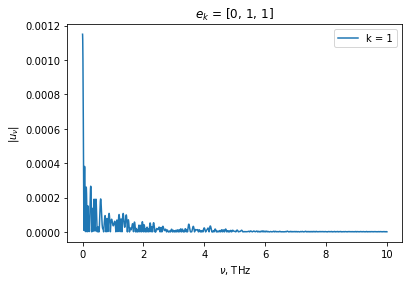

In [149]:
plt.plot(freq1,np.abs(uk_nu), label = "k = 1")
#plt.plot(freq1,np.abs(uk_nu08), label = "k = 0.8" )
#plt.plot(freq1,np.abs(uk_nu06), label = "k = 0.6" )
#plt.plot(freq1,np.abs(uk_nu04), label = "k = 0.4" )
#plt.plot(freq1,np.abs(uk_nu02), label = "k = 0.2" )
plt.legend()
plt.xlabel("$\\nu$, THz")
plt.ylabel("$|u_{\\nu}|$")
plt.savefig("plot20_.png") 
plt.title('$e_{k}$ = [0, 1, 1]')
plt.show()

In [127]:
# ВАРИАНТ 4
# k = [0.2, 0, 0]
from tqdm import tqdm
uk_02= np.zeros(1000)
ek = np.array([0,1,1])

# тут построить разные е или к
# С = 2pi/a = 2pi/3.417 = 1.838
k_02 = np.array([0.2 * 1.838,0,0])
i = 0
for step in tqdm(time):
    for j in range(128000):
        uk_02[i] += np.dot(dataDict[step][j], ek) * np.cos(np.dot(k_02,r0[j]))/128000
    i = i + 1
    #print(step, end = " ")


import math
freq1 = np.linspace(0, 10, 10000)
uk_nu02 = np.zeros(10000)
for i in range(10000):
    if (i%100 == 0):
        print(i, end= " ")
    for step in time:
        uk_nu02[i] = uk_nu02[i] + (uk_02[step] * np.cos(2 * math.pi * freq1[i] * step * 0.010))/1000

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [15:57<00:00,  1.04it/s]


0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 

No handles with labels found to put in legend.


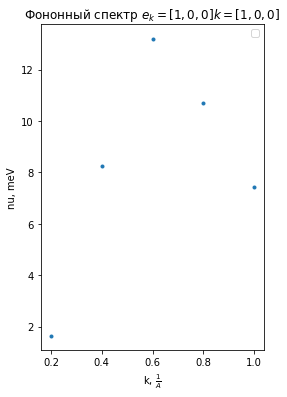

In [173]:
nu = np.array([0.4, 2.0, 3.2, 2.6, 1.8])*4.12
k = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.figure(figsize=[4,6])
plt.plot(k, nu, '.')
plt.xlabel("k, $\\frac{1}{A}$")
plt.ylabel("nu, meV")
plt.savefig("phonon_spector1.png") 
plt.title('Фононный спектр $e_{k} = [1, 0, 0] k = [1, 0, 0]$')
plt.show()




No handles with labels found to put in legend.


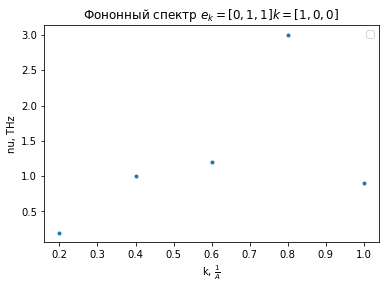

In [157]:
nu = [0.2, 1.0, 1.2, 3.0, 0.9]
k = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.plot(k, nu, '.')
plt.xlabel("k, $\\frac{1}{A}$")
plt.ylabel("nu, THz")
plt.savefig("phonon_spector2.png") 
plt.title('Фононный спектр $e_{k} = [0, 1, 1] k = [1, 0, 0]$')
plt.show()